## Instructions

Task: Create code using python xarray to organize and reduce climate data. The goal of this analysis will be to detect global atmospheric circulation patterns (or teleconnections) associated with extreme daily precipitation in a certain part of the globe. You will

(1) Aggregate daily rainfall data from the Global Precipitaiton Climatology Project 1 degree daily precipitation data over the period **1996 - 2019** into a single file from daily files, available here: [https://www.ncei.noaa.gov/data/global-precipitation-climatology-project-gpcp-daily/access/ ].

(2) Determine the 95% values of daily precipitation during a selected particular 3-month period (given in the table below by group) over the grid box closest to the city you are examining. Plot a cumulative distribution function of all values daily precipitation values and illustrate the 95% value of daily precipitation in millimeters.

(3) Using output from the NCEP Reanalysis [https://journals.ametsoc.org/doi/pdf/10.1175/1520-0477(1996)077%3C0437%3ATNYRP%3E2.0.CO%3B2](Kalnay et al. 1996), compute the **global mean fields** and **seasonal anomaly fields** for days meeting and exceeding the threshold of precipitation calculated in the previous step (using the 1981-2010 as a base period for anomalies) of

* **250 hPa wind vectors and wind speed,**
* 500 hPa winds and geopotential height,
* 850 hPa temperature, specific humidity, and winds,
* **skin temperature, and surface winds,** and
* **total atmospheric column water vapor.**

(4) Create maps showing **the mean fields for the extreme precipitation day composites**, **long term mean composites for the selected months**, and **the anomaly fields for each variable**. Use contours and vectors when appropriate.

NCEP reanalysis data is available from the NOAA Physical Sciences Division THREDDS server here: [https://www.esrl.noaa.gov/psd/thredds/catalog/Datasets/catalog.html]. xarray can access these files directly. For example, to get the long term mean for u-wind by month, you can access

`data = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.ltm.nc',engine='netcdf4')`

Aggregations of the 6-hourly data are available like this:

`data = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Aggregations/ncep.reanalysis/pressure/uwnd.nc', engine='netcdf4')`

## Data retrieval and processing

### module import

In [1]:
%pylab inline
!pip install netcdf4
!pip install pydap # to read remote netcdf files

Populating the interactive namespace from numpy and matplotlib
     |████████████████████████████████| 4.1MB 2.9MB/s 
     |████████████████████████████████| 317kB 22.8MB/s 
     |████████████████████████████████| 2.3MB 2.8MB/s 
     |████████████████████████████████| 122kB 58.3MB/s 


In [0]:
import xarray as xr
import pandas as pd

### 250 hPa wind vectors and wind speed,

In [6]:
# base period
years = pd.date_range( start='1981-01-01', end='2010-12-01', freq='AS') # 30 years

uwind = []
vwind = []
for iyr in years.year:
    print('working on '+str(iyr))
    # create dates in DJF (discarding Feb 29 in leap years) for the base period
    dates1 = pd.date_range(pd.datetime(iyr,1,1),pd.datetime(iyr,2,28),freq='D')
    dates2 = pd.date_range(pd.datetime(iyr,12,1),pd.datetime(iyr,12,31),freq='D')
    dates = dates1.union(dates2) # 90 days per year
    # access uwind at 250 hPa
    u = xr.open_dataset(
        'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',
        engine='netcdf4').sel(level=250,time=dates)
    uwind.append(u)
    # access vwind at 250 hPa
    v = xr.open_dataset(
        'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',
        engine='netcdf4').sel(level=250,time=dates)
    vwind.append(v)


working on 1981
working on 1982
working on 1983
working on 1984
working on 1985
working on 1986
working on 1987
working on 1988
working on 1989
working on 1990
working on 1991
working on 1992
working on 1993
working on 1994
working on 1995
working on 1996
working on 1997
working on 1998
working on 1999
working on 2000
working on 2001
working on 2002
working on 2003
working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working on 2010


In [7]:
uwind_ref = xr.concat(uwind, dim='time')
vwind_ref = xr.concat(vwind, dim='time')
uwind_ref, vwind_ref

(<xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144, time: 2700)
 Coordinates:
     level    float32 250.0
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
   * time     (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2010-12-31
 Data variables:
     uwnd     (time, lat, lon) float32 -6.019989 -6.269989 ... -7.3799896
 Attributes:
     References:                      http://www.esrl.noaa.gov/psd/data/gridde...
     dataset_title:                   NCEP-NCAR Reanalysis 1
     Conventions:                     COARDS
     title:                           mean daily NMC reanalysis (1981)
     description:                     Data is from NMC initialized reanalysis\...
     platform:                        Model
     history:                         created 95/02/06 by Hoop (netCDF2.3)\nCo...
     DODS_EXTRA.Unlimited_Dimension:  time, <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 14

In [0]:
uwind_ref_avg = uwind_ref['uwnd'].mean(dim = 'time') # means over time on each grid
vwind_ref_avg = vwind_ref['vwnd'].mean(dim = 'time') # means over time on each grid
# uwind_ref_avg.plot()
# vwind_ref_avg.plot()

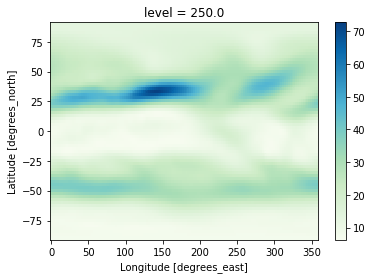

In [10]:
# windspeed
wdsp_ref = np.sqrt(uwind_ref['uwnd']**2 + vwind_ref['vwnd']**2)
wdsp_ref_avg = wdsp_ref.mean(dim = 'time')
wdsp_ref_avg.plot(cmap='GnBu')

### skin temperature, 

In [51]:
# getting data for monthly long term mean of skin temp (skt) in DJF
# import cftime
# months = cftime.datetime(1,1,1)

months = ['0001-01','0001-02','0001-12']
skt = []
for imth in months:
    t = xr.open_dataset(
        'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.sfc.mon.1981-2010.ltm.nc',
        engine='netcdf4').sel(time=imth)
    skt.append(t)

skt_ref = xr.concat(skt,dim='time')
skt_ref

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

<xarray.Dataset>
Dimensions:             (lat: 94, lon: 192, nbnds: 2, time: 3)
Coordinates:
  * lat                 (lat) float32 88.542 86.6531 ... -86.6531 -88.542
  * lon                 (lon) float32 0.0 1.875 3.75 ... 354.375 356.25 358.125
  * time                (time) object 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 1981-01-01 ... 2010-12-01
    skt                 (time, lat, lon) float32 -33.146435 ... -20.494667
    valid_yr_count      (time, lat, lon) float32 2.755107e-39 ... 0.0
Attributes:
    title:                          4x daily NMC reanalysis
    description:                    Data is from NMC initialized reanalysis\n...
    platform:                       Model
    Conventions:                    COARDS
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...
    history:                        Created 2011/07/12 by doMonthLTM\nConvert...
    References:                     http://www.esrl.noaa.gov/psd/data/gridded...
    dataset_title:                  NCEP-NCAR Reanalysis 1

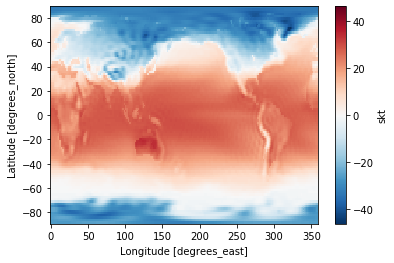

In [53]:
# calculate long term mean per grid
skt_ref_avg = skt_ref['skt'].mean(dim='time')
skt_ref_avg.plot()

In [0]:
# skin temperature
# NEED TO MODIFY TO DO OVERALL PERIOD
years = pd.date_range(start='1981-01-01', end='2010-12-01', freq='AS') # 30 years

skt = [] #skin temperature
for iyr in years.year:
    print('working on '+str(iyr))
    # create dates in DJF (discarding Feb 29 in leap years) for the base period
    dates1 = pd.date_range(pd.datetime(iyr,1,1),pd.datetime(iyr,2,28),freq='D')
    dates2 = pd.date_range(pd.datetime(iyr,12,1),pd.datetime(iyr,12,31),freq='D')
    dates = dates1.union(dates2) # 90 days per year
    # access uwind at 250 hPa
    t = xr.open_dataset(
        'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/surface_gauss/skt.sfc.gauss.'+str(iyr)+'.nc',
        engine='netcdf4').sel(level=250,time=dates)
    skt.append(t)
#########################################


### surface winds,

In [22]:
# getting data for monthly long term mean of surface winds in DJF

months = ['0001-01','0001-02','0001-12']

uwnd_sfc = []
vwnd_sfc = []
for imth in months:
    u = xr.open_dataset(
        'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.sig995.mon.1981-2010.ltm.nc',
        engine='netcdf4').sel(time=imth)
    uwnd_sfc.append(u)
    v = xr.open_dataset(
        'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.sig995.mon.1981-2010.ltm.nc',
        engine='netcdf4').sel(time=imth)
    vwnd_sfc.append(v)

uwnd_sfc_ref = xr.concat(uwnd_sfc,dim='time')
vwnd_sfc_ref = xr.concat(vwnd_sfc,dim='time')

wdsp_sfc_ref = np.sqrt(uwnd_sfc_ref['uwnd']**2 + vwnd_sfc_ref['vwnd']**2)

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

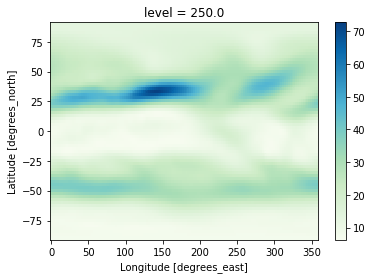

In [23]:
uwnd_sfc_ref_avg = uwnd_sfc_ref['uwnd'].mean(dim='time')
vwnd_sfc_ref_avg = vwnd_sfc_ref['vwnd'].mean(dim='time')
wdsp_sfc_ref_avg = wdsp_sfc_ref.mean(dim = 'time')
wdsp_ref_avg.plot(cmap='GnBu')

### Total atmospheric column water vapor

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

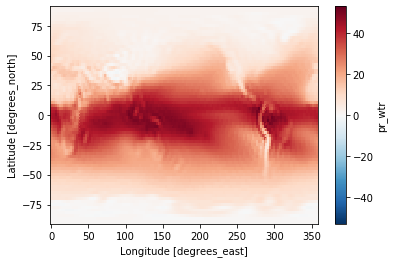

In [81]:
# getting data for monthly long term mean of pricipitable water of entire atmosphere (pr_wtr.eatm) in DJF

months = ['0001-01','0001-02','0001-12']
prwtr = []
for imth in months:
    w = xr.open_dataset(
        'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.eatm.mon.1981-2010.ltm.nc',
        engine='netcdf4').sel(time=imth)
    prwtr.append(w)

prwtr_ref = xr.concat(prwtr,dim='time')

# long term mean
prwtr_ref_avg = prwtr_ref['pr_wtr'].mean(dim='time')
prwtr_ref_avg.plot()

## plotting with Cartopy

### install Cartopy and import modules

In [3]:
# install cartopy
!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy

Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 358kB 2.9MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    U

In [0]:
# import modules
import cartopy
import cartopy.crs as ccrs #coordinate reference system
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

### Mapping

#### 250 hPa windspeed

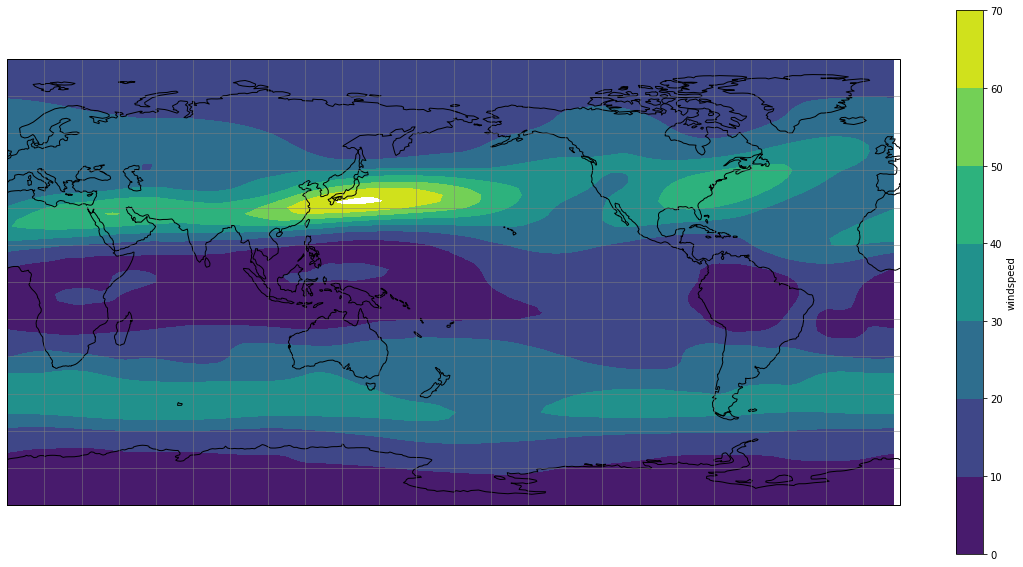

In [21]:
# windspeed

# create figure, axes instances.
fig = plt.figure(figsize=(20, 10))

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(wdsp_ref_avg['lon'], wdsp_ref_avg['lat'], wdsp_ref_avg, transform=ccrs.PlateCarree(), levels=np.linspace(0, 70, 8)); # need to specify levels
ax.set_global(); # for global dataset
ax.coastlines();
#im = imshow(wdsp_ref_avg)
plt.colorbar().set_label('windspeed')

#set up the gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')

#set where the gridlines go
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,15))
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,15))

plt.show()

#### skin temperature

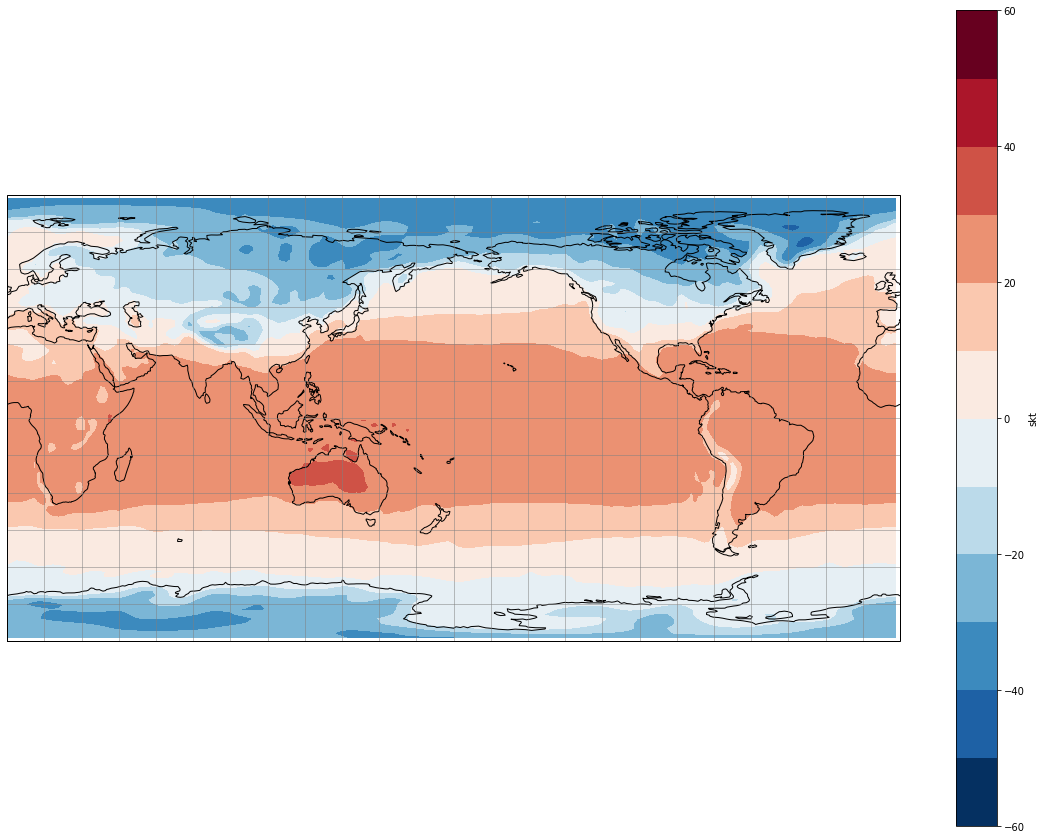

In [63]:
# skin temp

# create figure, axes instances.
fig = plt.figure(figsize=(20, 15))

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax = plt.axes(projection=ccrs.PlateCarree())
skt_ref_avg.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=np.linspace(-60, 60, 13)); # need to specify levels
ax.set_global(); # for global dataset
ax.coastlines();

#set up the gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')

#set where the gridlines go
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,15))
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,15))

plt.show()

#### total atmospheric column water

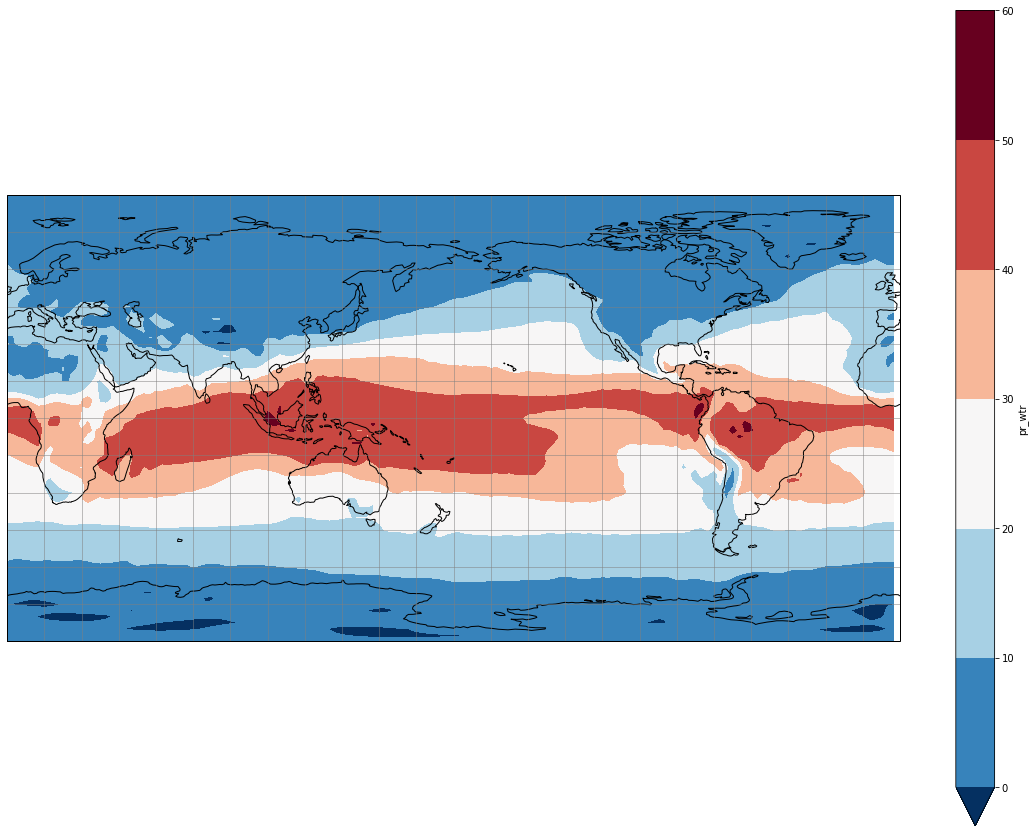

In [83]:
# pr_wtr

# create figure, axes instances.
fig = plt.figure(figsize=(20, 15))

ax = plt.subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
#ax = plt.axes(projection=ccrs.PlateCarree())
prwtr_ref_avg.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), levels=np.linspace(0, 60, 7)); # need to specify levels
ax.set_global(); # for global dataset
ax.coastlines();

#set up the gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')

#set where the gridlines go
gl.xlocator = mticker.FixedLocator(np.arange(-180,181,15))
gl.ylocator = mticker.FixedLocator(np.arange(-90,91,15))

plt.show()

### Vector plotting

#### 250 hPa wind vectors

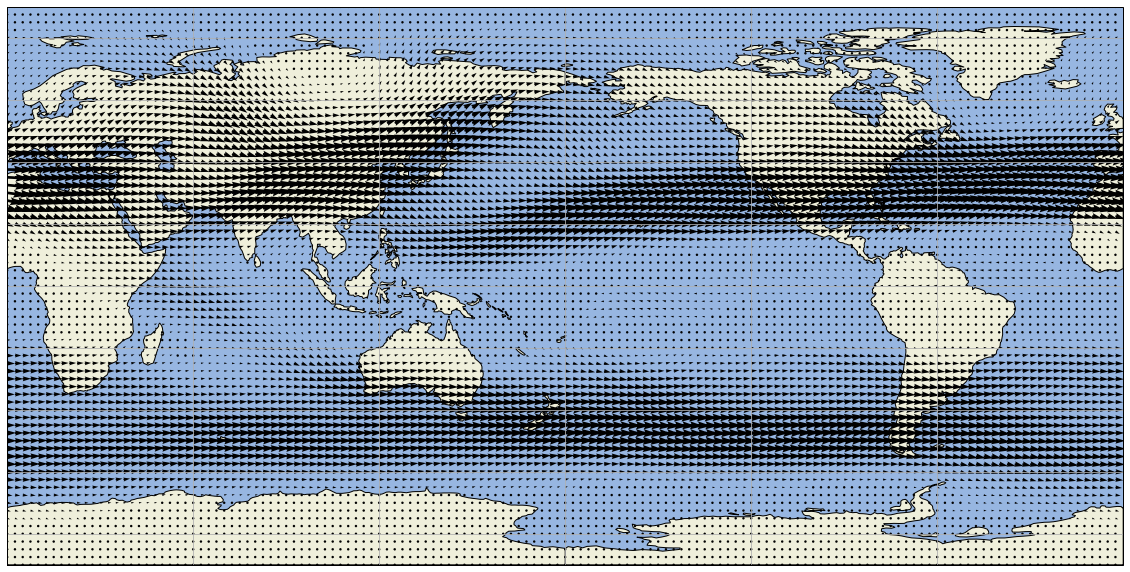

In [40]:
# wind vector

plt.figure(figsize=(20,15))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')

ax.set_global()
ax.gridlines()

#x, y, u, v, vector_crs = sample_data()
ax.quiver(uwind_ref['lon'], uwind_ref['lat'], uwind_ref_avg, vwind_ref_avg)#, transform=vector_crs)
#ax.barbs(x, y, u, v, transform=vector_crs)
#ax.streamplot(x, y, u, v, transform=vector_crs)

plt.show()

In [35]:
# def sample_data(shape=(20, 30)):
#     """
#     Returns ``(x, y, u, v, crs)`` of some vector data
#     computed mathematically. The returned crs will be a rotated
#     pole CRS, meaning that the vectors will be unevenly spaced in
#     regular PlateCarree space.

#     """
#     crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

#     x = np.linspace(311.9, 391.1, shape[1])
#     y = np.linspace(-23.6, 24.8, shape[0])

#     x2d, y2d = np.meshgrid(x, y)
#     u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
#     v = 20 * np.cos(6 * np.deg2rad(x2d))

#     return x, y, u, v, crs

# x, y, u, v, vector_crs = sample_data()
# shape(x), shape(y), shape(u), shape(v)

((30,), (20,), (20, 30), (20, 30))

#### surface winds

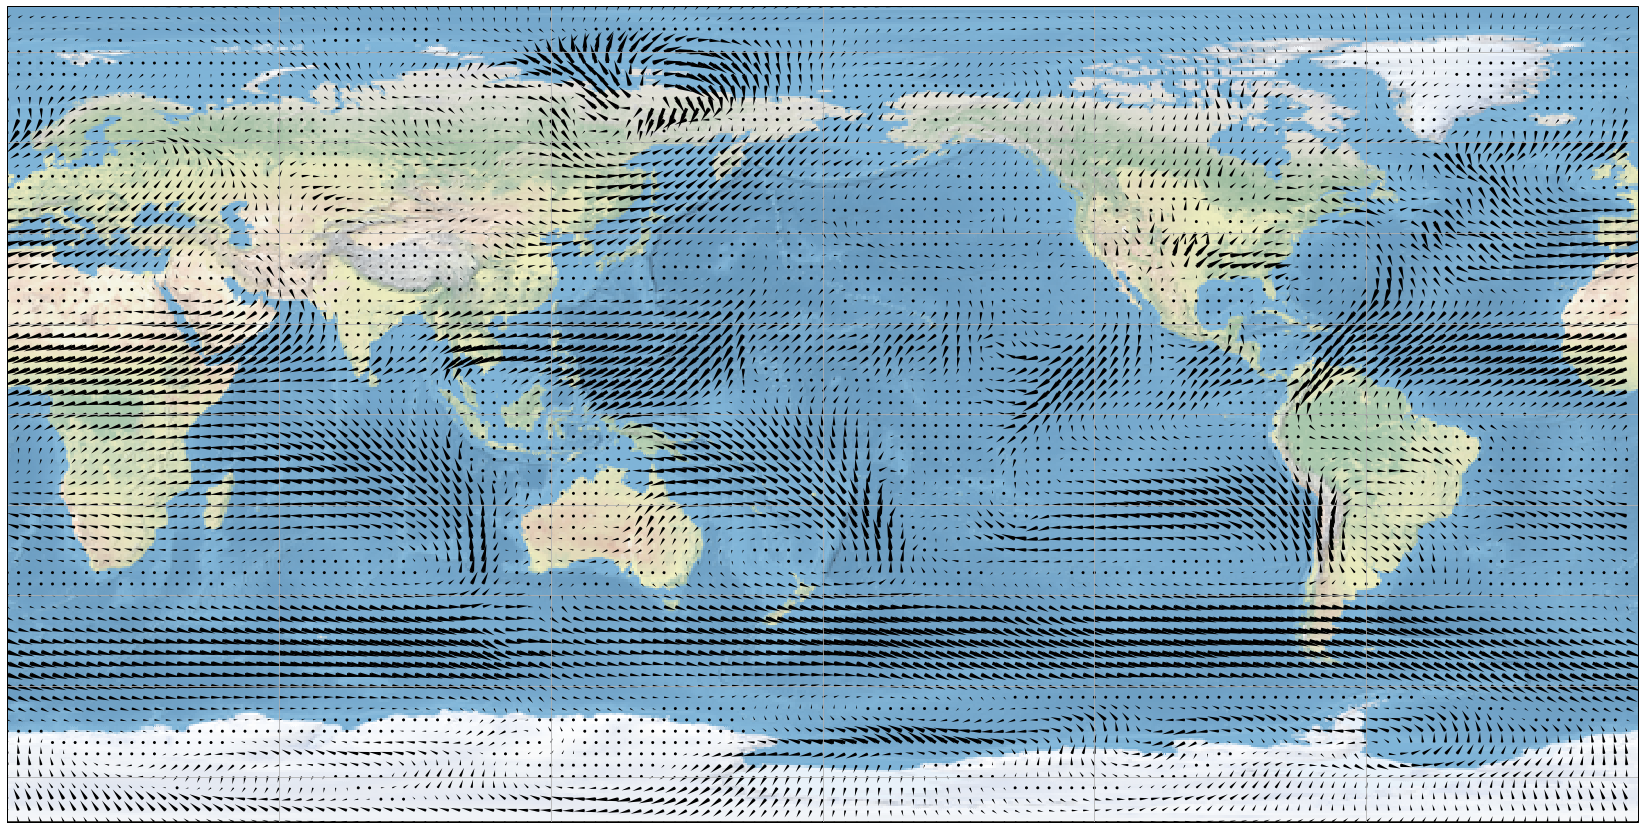

In [37]:
# wind vector

plt.figure(figsize=(30,15))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.OCEAN, zorder=0)
ax.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
ax.stock_img()
ax.set_global()
ax.gridlines()

#wdsp_sfc_ref_avg.plot.contourf(ax=ax)#, transform=ccrs.PlateCarree(), levels=np.linspace(0, 70, 8));
ax.quiver(uwnd_sfc_ref['lon'], uwnd_sfc_ref['lat'], uwnd_sfc_ref_avg, vwnd_sfc_ref_avg, width=0.002, headwidth=1.5)#, transform=vector_crs)
#ax.barbs(uwnd_sfc_ref['lon'], uwnd_sfc_ref['lat'], uwnd_sfc_ref_avg, vwnd_sfc_ref_avg, sizes={'spacing': 0.01})
#ax.streamplot(uwnd_sfc_ref['lon'], uwnd_sfc_ref['lat'], uwnd_sfc_ref_avg, vwnd_sfc_ref_avg)

plt.show()